Stock Correlation analysis
**Be advised this is an intersting project that I did to expand my knowledge on different currencies. It is not in any way financial advice to be acted on. I recommend that you also do your own research before investing.

In [44]:
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt


#Start of time frame from 4 years ago up until today
start = dt(2018,1,1)
now = dt.now()
#Stock tickers
#If you want to use this project you can add your own stock tickers, just make sure they exist in the time frame
tickers = ["FB", "GS", "NVDA", "MSFT", "TSLA", "AAPL", "CCL", "BA", "GOLD", "SILVER-USD"]
colnames = []

for ticker in tickers:
    data = pdr.get_data_yahoo(ticker, start, now)
    if len(colnames) == 0:
        #Take the closest adjusted price and copy it
        combined = data[['Adj Close']].copy()
    else:
        combined = combined.join(data['Adj Close'])
    #Append to the colnames to know which stock we already added
    colnames.append(ticker)
    combined.columns = colnames
    
print(combined)

                    FB          GS        NVDA        MSFT        TSLA  \
Date                                                                     
2018-01-02  181.419998  237.127731   49.380810   81.530228   64.106003   
2018-01-03  184.669998  234.920319   52.630737   81.909676   63.450001   
2018-01-04  184.330002  238.203568   52.908173   82.630585   62.924000   
2018-01-05  186.850006  236.988602   53.356529   83.655045   63.316002   
2018-01-08  188.279999  233.547668   54.991409   83.740410   67.281998   
...                ...         ...         ...         ...         ...   
2022-02-16  216.539993  360.049988  265.109985  299.500000  923.390015   
2022-02-17  207.710007  349.059998  245.070007  290.730011  876.349976   
2022-02-18  206.160004  346.040009  236.419998  287.929993  856.979980   
2022-02-22  202.080002  344.269989  233.899994  287.720001  821.530029   
2022-02-23  198.449997  341.190002  223.869995  280.269989  764.039978   

                  AAPL        CCL    

We get the results above from the Yahoo Finacne API.
We can see the Dates and the price of the stocks in the Ticker list we created.


Lets try to visualize the results without setting the scale to logarithmic.

<function matplotlib.pyplot.show(close=None, block=None)>

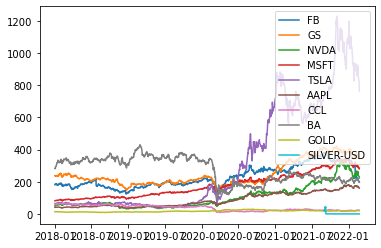

In [45]:
for ticker in tickers:
    plt.plot(combined[ticker], label=ticker)
    
plt.legend(loc="upper right")
plt.show

Problem is that some stocks have a much higher price than others.
We don't see an analysis of the movement in the above graph but just a visualization of price changes through time.
Now we set the scale to logarithmic, to see the fluctuations more clearly.

In [46]:
corr_data = combined.pct_change()
print(corr_data)

                  FB        GS      NVDA      MSFT      TSLA      AAPL  \
Date                                                                     
2018-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2018-01-03  0.017914 -0.009309  0.065814  0.004654 -0.010233 -0.000174   
2018-01-04 -0.001841  0.013976  0.005271  0.008801 -0.008290  0.004645   
2018-01-05  0.013671 -0.005101  0.008474  0.012398  0.006230  0.011386   
2018-01-08  0.007653 -0.014519  0.030641  0.001020  0.062638 -0.003714   
...              ...       ...       ...       ...       ...       ...   
2022-02-16 -0.020181 -0.010689  0.000604 -0.001167  0.001041 -0.001389   
2022-02-17 -0.040778 -0.030524 -0.075591 -0.029282 -0.050943 -0.021269   
2022-02-18 -0.007462 -0.008652 -0.035296 -0.009631 -0.022103 -0.009356   
2022-02-22 -0.019790 -0.005115 -0.010659 -0.000729 -0.041366 -0.017812   
2022-02-23 -0.017963 -0.008946 -0.042882 -0.025893 -0.069979 -0.025864   

                 CCL        BA      G

<function matplotlib.pyplot.show(close=None, block=None)>

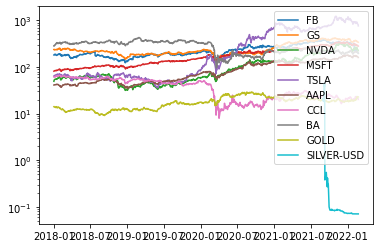

In [47]:
plt.yscale("log")
for ticker in tickers:
    plt.plot(combined[ticker], label=ticker)
    
plt.legend(loc="upper right")
plt.show

Let's see the fluctating changes in percentages.

In [48]:
corr_data = combined.pct_change().corr(method="pearson")
print(corr_data)

                  FB        GS      NVDA      MSFT      TSLA      AAPL  \
FB          1.000000  0.394233  0.543354  0.621371  0.319112  0.575014   
GS          0.394233  1.000000  0.452673  0.536968  0.314218  0.517941   
NVDA        0.543354  0.452673  1.000000  0.696945  0.432504  0.635914   
MSFT        0.621371  0.536968  0.696945  1.000000  0.436692  0.755836   
TSLA        0.319112  0.314218  0.432504  0.436692  1.000000  0.425572   
AAPL        0.575014  0.517941  0.635914  0.755836  0.425572  1.000000   
CCL         0.237285  0.549343  0.252709  0.297503  0.240196  0.291509   
BA          0.304720  0.593439  0.343657  0.411809  0.299813  0.412183   
GOLD        0.131835  0.051585  0.111446  0.118506  0.142348  0.120000   
SILVER-USD  0.046364  0.068415  0.017138  0.027460  0.093282  0.187555   

                 CCL        BA      GOLD  SILVER-USD  
FB          0.237285  0.304720  0.131835    0.046364  
GS          0.549343  0.593439  0.051585    0.068415  
NVDA        0.252709

Now I'm going to plot a heat map using the correlation data above using seaborn.

<AxesSubplot:>

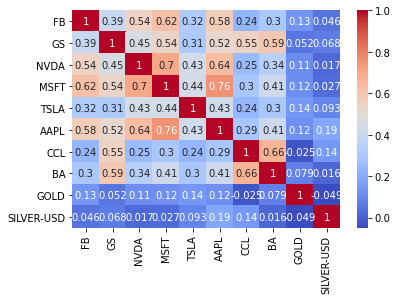

In [49]:
sns.heatmap(corr_data, annot=True, cmap="coolwarm")


Now let's figure out the correlation.
Guidelines:
The warmer it gets the more correlation we have.
Well firstly the stocks have correlation with themselves(Diagonal red "1" squares) -> if stock a rises then stock b rises.
A non-correlation wuld be 0 and a negative (-1) correlation means opposite correlation.
For example Apple  and Microsoft are highly correlated. 
Microsoft and Nvidia are highly correlated
Then Facebook and Microsoft to some degree are correlacted
And so on...

Great now lets see the correlatin between crypto currencies that Yahoo Finance offers.

In [56]:
start = dt(2018,1,1)
now = dt.now()
#Stock tickers
#If you want to use this project you can add your own stock tickers, just make sure they exist in the time frame
crypto = ["BTC", "ETH-USD", "DAG", "XRP-USD", "DOGE-USD", "SHIB-USD", "BCH-USD", "HBAR-USD" ]
colnames_c = []

for currency in crypto:
    data_c = pdr.get_data_yahoo(currency, start, now)
    if len(colnames_c) == 0:
        #Take the closest adjusted price and copy it
        combined_c = data_c[['Adj Close']].copy()
    else:
        combined_c = combined_c.join(data_c['Adj Close'])
    #Append to the colnames to know which stock we already added
    colnames_c.append(currency)
    combined_c.columns = colnames_c
    
print(combined_c)

                   BTC      ETH-USD   DAG   XRP-USD  DOGE-USD  SHIB-USD  \
Date                                                                      
2020-10-01  100.000000   353.205902  2.00  0.238249  0.002616  0.000000   
2020-10-02  100.000000   346.238922  2.00  0.234117  0.002583  0.000000   
2020-10-05   99.995003   353.956787  2.00  0.250816  0.002612  0.000000   
2020-10-06  100.029999   340.815857  2.00  0.245341  0.002611  0.000000   
2020-10-07   99.919998   341.808655  2.00  0.248539  0.002595  0.000000   
...                ...          ...   ...       ...       ...       ...   
2022-02-15   96.355003  3179.877197  3.55  0.852333  0.151761  0.000031   
2022-02-16   96.434097  3127.830078  3.55  0.839036  0.149095  0.000031   
2022-02-17   96.567200  2881.481934  3.55  0.767173  0.138552  0.000028   
2022-02-18   96.642303  2785.727539  3.50  0.785890  0.138768  0.000028   
2022-02-22   96.523903  2639.299316  3.65  0.722833  0.131553  0.000025   

               BCH-USD  

 Visualize the results for crypto currencies now

<function matplotlib.pyplot.show(close=None, block=None)>

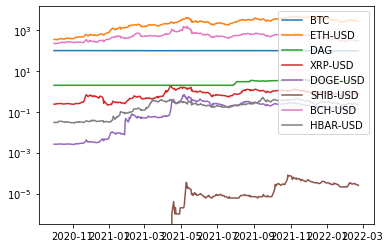

In [57]:
plt.yscale("log")
for currency in crypto:
    plt.plot(combined_c[currency], label=currency)
    
plt.legend(loc="upper right")
plt.show

In [58]:
corrcrypto_data = combined_c.pct_change().corr(method="pearson")
print(corrcrypto_data)

               BTC   ETH-USD       DAG   XRP-USD  DOGE-USD  SHIB-USD  \
BTC       1.000000 -0.007516  0.053604 -0.015957  0.043444 -0.019106   
ETH-USD  -0.007516  1.000000  0.079869  0.485675  0.306399  0.173957   
DAG       0.053604  0.079869  1.000000  0.030479  0.005394  0.002873   
XRP-USD  -0.015957  0.485675  0.030479  1.000000  0.190532 -0.084422   
DOGE-USD  0.043444  0.306399  0.005394  0.190532  1.000000 -0.144479   
SHIB-USD -0.019106  0.173957  0.002873 -0.084422 -0.144479  1.000000   
BCH-USD   0.009195  0.696619  0.039887  0.539560  0.324185  0.006190   
HBAR-USD  0.002526  0.498137  0.032265  0.385992  0.199233 -0.090075   

           BCH-USD  HBAR-USD  
BTC       0.009195  0.002526  
ETH-USD   0.696619  0.498137  
DAG       0.039887  0.032265  
XRP-USD   0.539560  0.385992  
DOGE-USD  0.324185  0.199233  
SHIB-USD  0.006190 -0.090075  
BCH-USD   1.000000  0.436624  
HBAR-USD  0.436624  1.000000  


<AxesSubplot:>

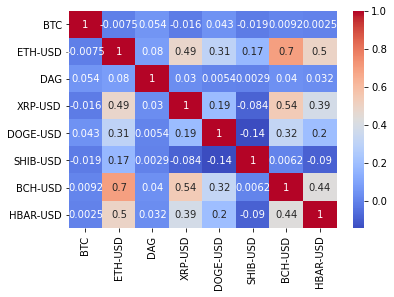

In [59]:
sns.heatmap(corrcrypto_data, annot=True, cmap="coolwarm")

The results are truly interesting. ETH and BTC have almost no correlation; but ETH and BCH are very much in correlation(0.7)
There is a 0.5 correlation with BCH and XRP and a less amount of correlation between HBAR(Which is considered an stable coin) and ETH
Other coins appear to have almost no correlation or very little like DOGE and XRP.